In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [21]:
df= pd.read_csv('ETH_1H.csv')
print(df.head())
yt,yf=train_test_split(df.Close,shuffle=False,test_size=0.3)

   Unix Timestamp                 Date  Symbol    Open    High     Low  \
0   1586995200000  2020-04-16 00:00:00  ETHUSD  152.94  152.94  150.39   
1   1586991600000  2020-04-15 23:00:00  ETHUSD  155.81  155.81  151.39   
2   1586988000000  2020-04-15 22:00:00  ETHUSD  157.18  157.30  155.32   
3   1586984400000  2020-04-15 21:00:00  ETHUSD  158.04  158.31  157.16   
4   1586980800000  2020-04-15 20:00:00  ETHUSD  157.10  158.10  156.87   

    Close       Volume  
0  150.39   650.188125  
1  152.94  4277.567299  
2  155.81   106.337279  
3  157.18    55.244131  
4  158.04   144.262622  


In [47]:
ETH=df[df['Symbol']=='ETHUSD']
ETH.drop(['Volume'],axis=1,inplace=True)

In [48]:
df.sample(5)

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
7252,1560877200000,2019-06-18 17:00:00,ETHUSD,264.40,265.00,261.47,9.735313,802.034250
34232,1463749200,2016-05-20 13:00:00,ETHUSD,14.50,14.50,13.54,1.707085,663.841994
30420,1477472400,2016-10-26 09:00:00,ETHUSD,11.70,11.70,11.70,1.431264,0.000000
8515,1556330400000,2019-04-27 02:00:00,ETHUSD,153.27,153.57,152.70,7.776984,116.280795
2557,1577790000000,2019-12-31 11:00:00,ETHUSD,131.27,131.93,131.27,7.297908,232.801449


In [49]:
Eth_month = ETH.resample('M').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(yt, label='USDINR_High_Train')
plt.plot(yf, label ='USDINR_High_Test')
plt.xlabel('Train, Test')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [ ]:
def auto_corr(k,lags):
    correl=[]
    y_mean=np.mean(k)
    den=np.sum((k-y_mean)**2) 
    for j in range(0,lags):
        num=0
        for i in range(0+j,len(k)):
            a=k[i]-y_mean
            b=k[i-j]-y_mean
            num=num+np.sum(a*b)       
        r=num/den
        correl.append(r)
    return pd.Series(correl)

In [ ]:
y_ACF=auto_corr(df.Close,1000)

In [ ]:
plt.figure(figsize=(10,10))
plt.stem(y_ACF)
plt.title('ACF function plot')
plt.xlabel('lags')
plt.ylabel('ACF')
plt.grid()
plt.show()

In [ ]:
col=df.Close[len(yt)-1]
col

In [ ]:
# Naive Method
def Naive_Pred(df2):
    g=[]
    for i in range(len(yt),len(yt)+len(yf)):
        col=df.Close[len(yt)-1]
        g.append(col)
    return g

In [ ]:
f=Naive_Pred(yf)
len(f)


In [ ]:
fig,ax=plt.subplots()
ax.plot(yt, label='Train Data')
ax.plot(yf, label='Test Data')
ax.plot(np.arange(len(yt),len(yt)+len(yf)),f,label='Naive Forecast')
ax.set_title('naive method forecast')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.legend()
plt.show()

In [ ]:
np.arange(len(yt),len(yt)+len(yf))

In [ ]:
#Average Method
def Average_pred(df3):
    g=[]
    for i in range(len(yt),len(yt)+len(yf)):
        col=np.mean(yt)
        g.append(col)
    return g

In [ ]:
pkb=Average_pred(yf)
print(len(pkb))

In [ ]:
fig,ax=plt.subplots()
ax.plot(yt, label= "Train_Data")
ax.plot(yf, label='Test_Data')
ax.plot(np.arange(len(yt),len(yt)+len(yf)),pkb, label='Average forecast')
ax.set_title('Average method forecast')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.legend()
plt.show()


In [ ]:
#drift method
def Drift_meth(df3):
    g=[]
    for i in range(0,len(yf)):
        col=df.Close[len(yt)]+((i)*(df.Close[len(yt)]-df.Close[0])/(len(yt)-1))
        g.append(col)
    return g

In [ ]:
dft=Drift_meth(yf)
dft

In [ ]:
fig,ax=plt.subplots()
ax.plot(yt, label= "Train_Data")
ax.plot(yf, label='Test_Data')
ax.plot(np.arange(len(yt),len(yt)+len(yf)),dft, label='Drift forecast')
ax.set_title('Drift method forecast')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.legend()
plt.show()

In [ ]:
#simple_Exponential_prediction_one_step
def simple_expo_smo(df3,alpha):
    pred=[np.nan,yt[0]]
    for i in range(2,len(yt)):
        newpred=pred[i-1]+(alpha*(yt[i-1]-pred[i-1]))
        pred.append(newpred)
    return pred
    

In [ ]:
x=simple_expo_smo(yt,0.3)    

In [ ]:
def simple_expo_smo_pred(df3,alpha):
    pred=[]
    for i in range(len(yt),len(yt)+len(yf)):
        newpred=x[-1]+(alpha*(yt[3202]-x[-1]))
        pred.append(newpred)
    return pred

In [ ]:
b=simple_expo_smo_pred(yf,0.3) 

In [ ]:
fig,ax=plt.subplots()
ax.plot(df.Close, label= "Orignal_Data")
ax.plot(x, label='Pred_One_Time_Data')
ax.plot(np.arange(len(yt),len(yt)+len(yf)),b, label='SES forecast')
ax.set_title('SES method forecast')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.legend()
plt.show()

In [ ]:
#holt's linear 
Holt_lin=ExponentialSmoothing(yt,trend='add',damped_trend=False,seasonal=None).fit()
holtlinearf=Holt_lin.forecast(steps=len(yf))
holtlinearf=pd.DataFrame(holtlinearf).set_index(yf.index)[0]
holt_linear_prediction = ExponentialSmoothing(yt, trend='add', damped_trend=True, seasonal=None).fit()
holt_linear_prediction_model = holt_linear_prediction.forecast(steps=len(yt))
holt_linear_predictions = pd.DataFrame(holt_linear_prediction_model).set_index(yt.index)[0]

In [ ]:
fig,ax=plt.subplots()
ax.plot(yt, label= "Orignal_Data")
ax.plot(yf, label='Pred_One_Time_Data')
ax.plot(np.arange(len(yt),len(yt)+len(yf)),holtlinearf, label='Holt liner forecast')
ax.set_title('Holt linerar method forecast')
ax.set_xlabel('time')
ax.set_ylabel('data')
ax.legend()
plt.show()

In [ ]:
#Holt's winter
holt_wintert=ExponentialSmoothing(yt,trend='mul',seasonal='mul',seasonal_periods=24).fit()
holt_winterf=holt_wintert.forecast(steps=len(yf))
holt_winter_f=pd.DataFrame(holt_winterf).set_index(yf.index)[0]

holt_winter_prediction = ExponentialSmoothing(yt, trend='mul', seasonal='mul',seasonal_periods=24).fit()
holt_winter_prediction_model = holt_winter_prediction.forecast(steps=len(yt))
holt_winter_predictions = pd.DataFrame(holt_winter_prediction_model).set_index(yt.index)[0]


In [ ]:
fitted_model = ExponentialSmoothing(yt,trend='mul',seasonal='mul',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(steps=len(yf))

In [ ]:
fig,ax=plt.subplots()
ax.plot(yt,label="Train_data")
ax.plot(yf,label='Test_Data')
ax.plot(holt_winterf, label = 'Holt Winter forecast')
ax.set_title('Holt winter method forecast')
ax.set_xlabel('time')
ax.set_ylabel('data')
plt.legend()
plt.show()

In [ ]:
fig,ax=plt.subplots()
ax.plot(yf)
ax.plot(test_predictions , label = 'Holt Winter forecast')
ax.set_title('Holt winter method forecast')
ax.set_xlabel('time')
ax.set_ylabel('data')
plt.legend()
plt.show()

In [3]:
df["Close_LogT"]= np.log(df['Close'])
def differencing(dataset):
    diff_close=[]
    for i in range(1,len(dataset)):
        value= dataset[i]-dataset[i-1]
        diff_close.append(value)
    return diff_close

Differential_close=differencing(df.Close_LogT)

In [34]:
from scipy import stats
df['Close'], lmbda = stats.boxcox(df.Close)

In [35]:
from itertools import product
import warnings
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")

for param in parameters_list:
    try:
        model = SARIMAX(df.Close, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [36]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters            aic
8     (2, 2) -114769.678826
2     (0, 2) -114768.481982
7     (2, 1) -114767.671077
5     (1, 2) -114767.369012
6     (2, 0) -114766.679902


In [37]:
print(best_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                34497
Model:               SARIMAX(2, 1, 2)   Log Likelihood               57389.839
Date:                Tue, 03 May 2022   AIC                        -114769.679
Time:                        22:14:33   BIC                        -114727.436
Sample:                             0   HQIC                       -114756.214
                              - 34497                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4232      0.070      6.066      0.000       0.286       0.560
ar.L2         -0.2936      0.038     -7.680      0.000      -0.369      -0.219
ma.L1         -0.4836      0.070     -6.881      0.0

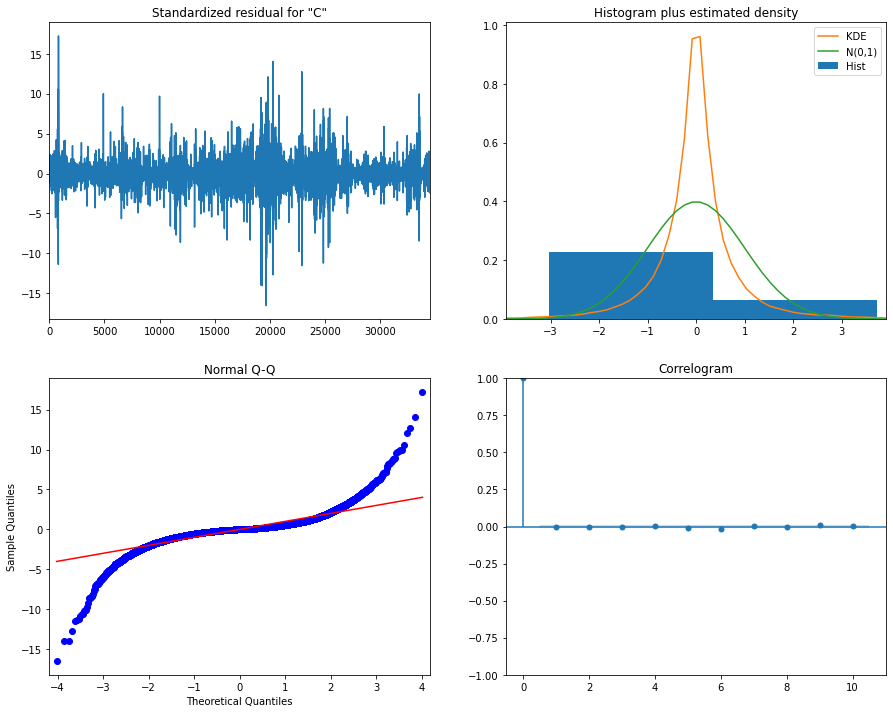

In [38]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [29]:
from scipy import stats
df['Close'], lmbda = stats.boxcox(df.Close)


In [41]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [44]:
# Prediction
df_pred = df[['Close']]

future = pd.DataFrame(index=df.Date, columns= df.columns)
df_pred = pd.concat([df_pred, future])

#btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
df_pred['forecast'] = invboxcox(best_model.predict(start=4/21/2020, end=5/9/2016), lmbda)

df_pred.Close.plot(linewidth=3)
df_pred.forecast.plot(color='r', ls='--', label='Predicted Close', linewidth=3)
plt.legend()
plt.grid()
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'